In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
print(f"Current path: {os.getcwd()}")
sys.path.append('./')

from supervisedlearning.homoskedastic import GaussianProcessRegressorRBF

Current path: /Users/marcomussi/git/HetGaussianProcesses


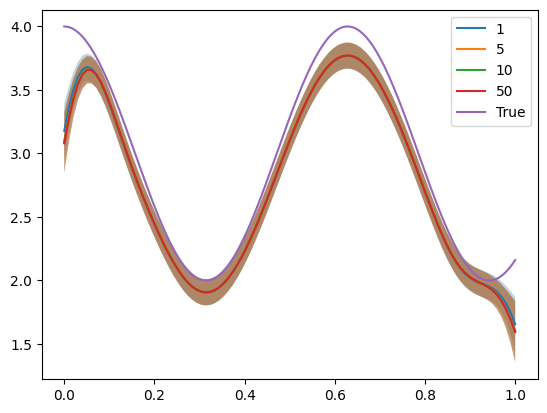

In [ ]:
x_plt = np.linspace(0, 1, 100).reshape(-1, 1)
kernel_L = 100

n_samples_list = [100, 500, 1000, 5000]
lmbd_list = [1, 5, 10, 50]

for n_samples, lmbd in zip(n_samples_list, lmbd_list): 
    
    x = np.linspace(0, 1, n_samples).reshape(-1, 1)
    y = 3 + np.cos(x*10)
    
    regressor = GaussianProcessRegressorRBF(kernel_L, lmbd)
    regressor.load_data(x, y)
    y_hat, sigma_hat = regressor.compute(x_plt)
    
    plt.plot(x_plt.ravel(), y_hat, label=lmbd)
    plt.fill_between(x_plt.ravel(), y_hat - sigma_hat, y_hat + sigma_hat, alpha=0.3)

plt.plot(x, y, label="True")
plt.legend()